### Imports

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from colorsetup import colors, palette

### Read the data

In [112]:
gcr_data = pd.read_csv("german_credit_data.csv", index_col=0)

In [113]:
gcr_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


1 -> Good <br>
0 -> Bad

In [114]:
y = (gcr_data['Risk']=='good').astype(int)
correlations = gcr_data[list(gcr_data.columns[:-1])].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Duration        -0.214927
Credit amount   -0.154739
Job             -0.032735
Age              0.091127
dtype: float64

In [115]:
sns.set_context('talk')
sns.set_palette(palette)
sns.set_style('white')

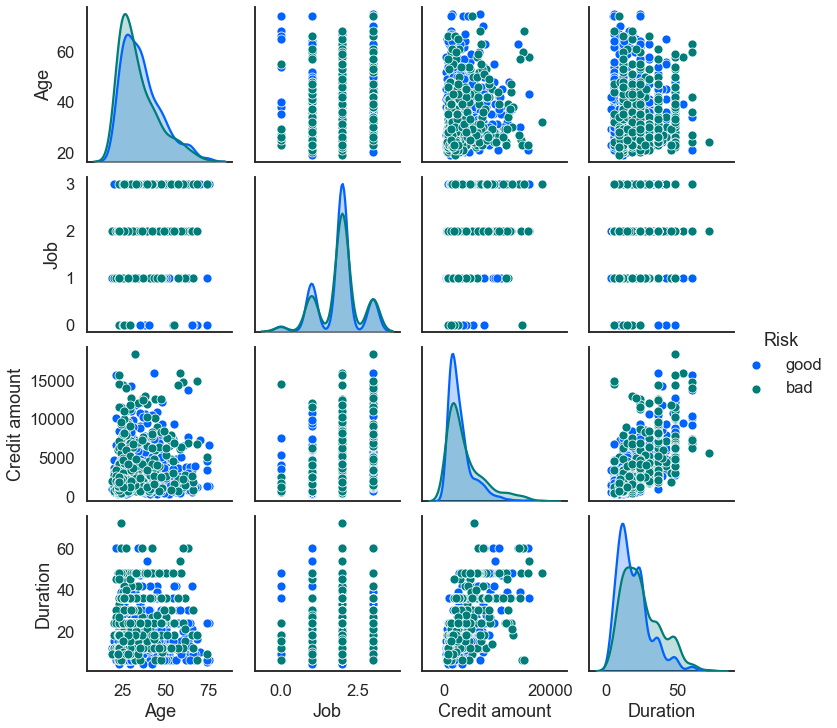

In [116]:
sns.pairplot(gcr_data, hue='Risk')

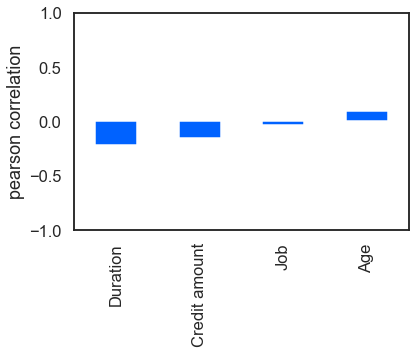

In [117]:
ax = correlations.plot(kind='bar', color=colors[0])
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [118]:
correlations.map(abs).sort_values().iloc[-2:].index

Index(['Credit amount', 'Duration'], dtype='object')

In [119]:
gcr_data.dtypes.value_counts()

object    6
int64     4
dtype: int64

In [120]:
gcr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 125.9+ KB


In [121]:
gcr_data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [122]:
gcr_data.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

#### For Handling Missing Values
https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

In [123]:
from sklearn.impute import SimpleImputer
values = gcr_data.values 
imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent') 
transformed_values = imputer.fit_transform(values) 

# strategy can be changed to "median" and “most_frequent”


In [124]:
transformed_values.shape

(1000, 10)

In [125]:
gcr_data_imputed = pd.DataFrame(transformed_values, columns=gcr_data.columns)

In [126]:
gcr_data_imputed.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [127]:
gcr_data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   object
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   object
 7   Duration          1000 non-null   object
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: object(10)
memory usage: 78.2+ KB


In [128]:
gcr_data_imputed["Credit amount"] = gcr_data_imputed["Credit amount"].astype(int)
gcr_data_imputed["Duration"] = gcr_data_imputed["Duration"].astype(int)
gcr_data_imputed["Job"] = gcr_data_imputed["Job"].astype(int)
gcr_data_imputed["Age"] = gcr_data_imputed["Age"].astype(int)

In [129]:
y = (gcr_data_imputed['Risk']=='good').astype(int)
correlations = gcr_data_imputed[list(gcr_data_imputed.columns[:-1])].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Duration        -0.214927
Credit amount   -0.154739
Job             -0.032735
Age              0.091127
dtype: float64

<AxesSubplot:>

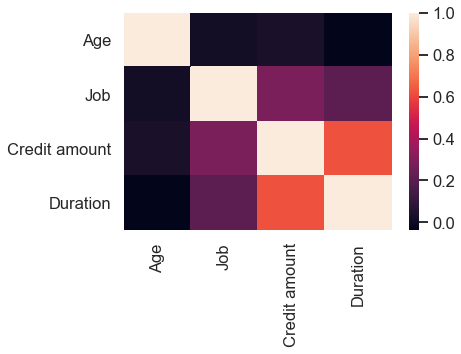

In [130]:
sns.heatmap(gcr_data_imputed.corr())

In [131]:
corr_values = gcr_data_imputed[list(gcr_data_imputed.columns[:-1])].corr()

tril_index = np.tril_indices_from(corr_values)
#display(tril_index)

for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN

corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [132]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.6')

,feature1,feature2,correlation,abs_correlation
5,Credit amount,Duration,0.624984,0.624984


In [133]:
'''
from fancyimpute import KNN    
# Use 5 nearest rows which have a feature to fill in each row's missing features
knnOutput = KNN(k=5, metric='hamming').fit_transform(gcr_data)
'''

"\nfrom fancyimpute import KNN    \n# Use 5 nearest rows which have a feature to fill in each row's missing features\nknnOutput = KNN(k=5, metric='hamming').fit_transform(gcr_data)\n"

In [134]:
gcr_data_imputed.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

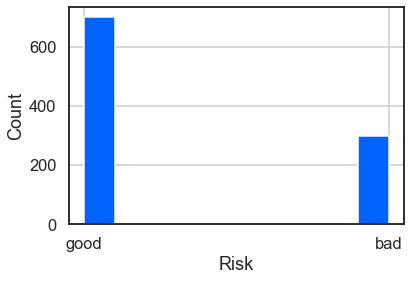

In [135]:
plt.figure()
gcr_data_imputed["Risk"].hist()
plt.xlabel("Risk")
plt.ylabel("Count")
plt.show()

### Glance at the Categorical Features

#### One-hot-encoding

In [136]:
mask = gcr_data_imputed.select_dtypes(include=['object'])
cat_cols = mask.columns
for col in cat_cols:
    print('{}: {}'.format(col, gcr_data_imputed[col].unique()))

Sex: ['male' 'female']
Housing: ['own' 'free' 'rent']
Saving accounts: ['little' 'quite rich' 'rich' 'moderate']
Checking account: ['little' 'moderate' 'rich']
Purpose: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk: ['good' 'bad']


In [137]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

In [138]:
binary_cols = ['Sex', 'Risk']

In [139]:
numeric_cols = ['Credit amount']

array([[<AxesSubplot:title={'center':'Credit amount'}>]], dtype=object)

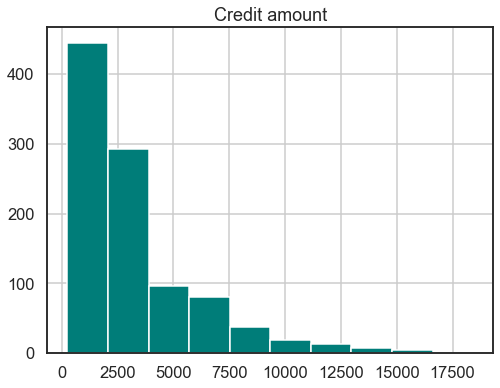

In [140]:
gcr_data_imputed[numeric_cols].hist(color=colors[1], figsize=(8, 6))

In [141]:
ordinal_cols = ['Saving accounts', 'Checking account', 'Age', 'Job']

In [142]:
ordinal_cols.append('Duration')

In [143]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [144]:
lb, le = LabelBinarizer(), LabelEncoder()

In [145]:
for column in ordinal_cols:
    gcr_data_imputed[column] = le.fit_transform(gcr_data_imputed[column])

In [146]:
gcr_data_imputed[ordinal_cols].astype('category').describe()

,Saving accounts,Checking account,Age,Job,Duration
count,1000,1000,1000,1000,1000
unique,4,3,53,4,33
top,0,0,8,2,17
freq,786,668,51,630,184


In [147]:
for column in binary_cols:
    gcr_data_imputed[column] = lb.fit_transform(gcr_data_imputed[column])

In [148]:
lb.classes_

array(['bad', 'good'], dtype='<U4')

In [149]:
non_ordinal_cols = list(set(cat_cols) - set(ordinal_cols) - set(binary_cols))
non_ordinal_cols

['Purpose', 'Housing']

In [150]:
one_hot_df = pd.get_dummies(gcr_data_imputed, columns=non_ordinal_cols)

In [151]:
one_hot_df.head()

,Age,Sex,Job,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Housing_free,Housing_own,Housing_rent
0,48,1,2,0,0,1169,2,1,0,0,0,0,0,1,0,0,0,1,0
1,3,0,2,0,1,5951,29,0,0,0,0,0,0,1,0,0,0,1,0
2,30,1,1,0,0,2096,8,1,0,0,0,1,0,0,0,0,0,1,0
3,26,1,2,0,0,7882,26,1,0,0,0,0,1,0,0,0,1,0,0
4,34,1,2,0,0,4870,17,0,0,1,0,0,0,0,0,0,1,0,0


In [152]:
correlations = one_hot_df[list(one_hot_df.drop(columns='Risk'))].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Duration                      -0.215811
Credit amount                 -0.154739
Housing_rent                  -0.092785
Housing_free                  -0.081556
Checking account              -0.052375
Purpose_education             -0.049085
Purpose_business              -0.036129
Job                           -0.032735
Purpose_vacation/others       -0.028058
Purpose_car                   -0.022621
Purpose_furniture/equipment   -0.020971
Purpose_repairs               -0.020828
Purpose_domestic appliances   -0.008016
Sex                            0.075493
Age                            0.091104
Saving accounts                0.102751
Purpose_radio/TV               0.106922
Housing_own                    0.134589
dtype: float64

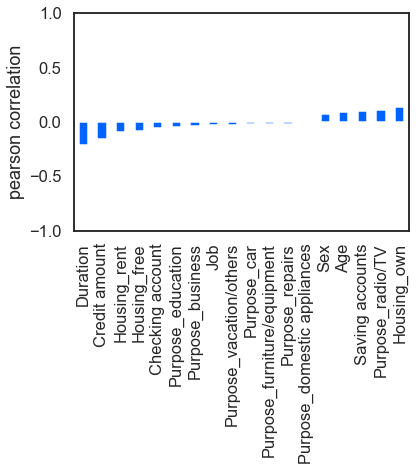

In [153]:
ax = correlations.plot(kind='bar', color=colors[0])
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [154]:
one_hot_df.shape

(1000, 19)

In [155]:
one_hot_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,16.521,11.294473,0.0,8.0,14.0,23.00,52.0
Sex,1000.0,0.690,0.462725,0.0,0.0,1.0,1.00,1.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Saving accounts,1000.0,0.373,0.805307,0.0,0.0,0.0,0.00,3.0
Checking account,1000.0,0.395,0.604434,0.0,0.0,0.0,1.00,2.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,13.718,7.522703,0.0,8.0,13.0,17.00,32.0
Risk,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
Purpose_business,1000.0,0.097,0.296106,0.0,0.0,0.0,0.00,1.0
Purpose_car,1000.0,0.337,0.472921,0.0,0.0,0.0,1.00,1.0


In [156]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [157]:
for column in [ordinal_cols + numeric_cols]:
    one_hot_df[column] = mm.fit_transform(one_hot_df[column])

In [158]:
round(one_hot_df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,0.318,0.217,0.0,0.154,0.269,0.442,1.0
Sex,1000.0,0.690,0.463,0.0,0.000,1.000,1.000,1.0
Job,1000.0,0.635,0.218,0.0,0.667,0.667,0.667,1.0
Saving accounts,1000.0,0.124,0.268,0.0,0.000,0.000,0.000,1.0
Checking account,1000.0,0.198,0.302,0.0,0.000,0.000,0.500,1.0
Credit amount,1000.0,0.166,0.155,0.0,0.061,0.114,0.205,1.0
Duration,1000.0,0.429,0.235,0.0,0.250,0.406,0.531,1.0
Risk,1000.0,0.700,0.458,0.0,0.000,1.000,1.000,1.0
Purpose_business,1000.0,0.097,0.296,0.0,0.000,0.000,0.000,1.0
Purpose_car,1000.0,0.337,0.473,0.0,0.000,0.000,1.000,1.0


In [159]:
outputfile = 'gcr_processed.csv'
one_hot_df.to_csv(outputfile, index=False)

### Correlation

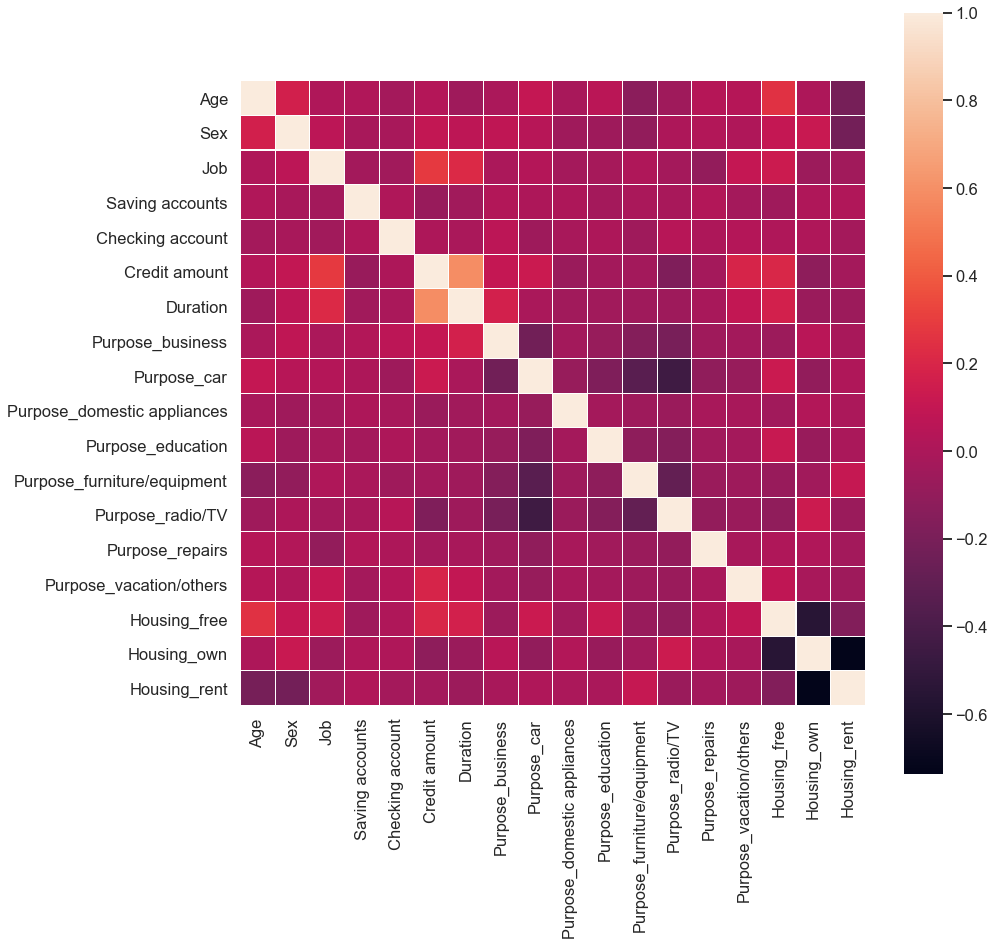

In [160]:
feature_cols = one_hot_df.drop("Risk", axis=1).columns
#print(feature_cols)

plt.figure(figsize=(14,14))
sns.heatmap(one_hot_df[feature_cols].corr(), square=True, linecolor='white', linewidths=0.1)
plt.show()

In [161]:
corr_values = one_hot_df[feature_cols].corr()
#corr_values

In [162]:
tril_index = np.tril_indices_from(corr_values)
#display(tril_index)

for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
#corr_values

In [163]:
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

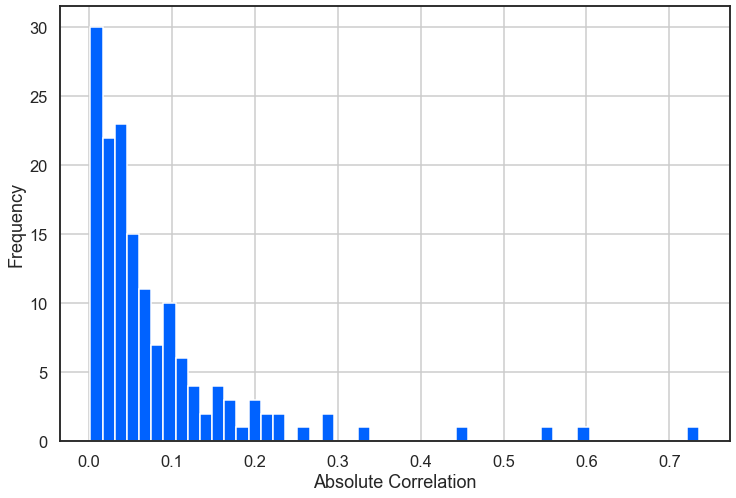

In [164]:
%matplotlib inline

sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [165]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.6')

,feature1,feature2,correlation,abs_correlation
152,Housing_own,Housing_rent,-0.735968,0.735968


### Preprocessing

In [166]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(one_hot_df[feature_cols], one_hot_df.Risk))

# Create the dataframes
X_train = one_hot_df.loc[train_idx, feature_cols]
y_train = one_hot_df.loc[train_idx, 'Risk']

X_test  = one_hot_df.loc[test_idx, feature_cols]
y_test  = one_hot_df.loc[test_idx, 'Risk']

In [167]:
y_train.value_counts(normalize=True)

1    0.7
0    0.3
Name: Risk, dtype: float64

In [168]:
y_test.value_counts(normalize=True)

1    0.7
0    0.3
Name: Risk, dtype: float64